In [1]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import numpy as np 

In [28]:
files = os.listdir("model_exports/test_size30/rseeds")
dfs = []
for f in files: 
    ff = pd.read_csv("model_exports/test_size30/rseeds/" + f)
    dfs.append(ff)
df = pd.concat(dfs)

In [29]:
lgbs = df[df.model=="LGBMClassifier"]
lgbs = lgbs[~ lgbs.data.isin(["metadata_nb_lda_scale","metadata_nb_w2v_scale", "metadata_nobin", "metadata_nb_scale"]) ]

In [33]:
data_rename = pd.DataFrame({
    'data': ['metadata', 'metadata_nb', 'metadata_nb_nlp', 'metadata_nb_lda', 'metadata_nb_w2v'], 
    'name':[
        'Metadata', 'Metadata + NB', 'Metadata + NB + NLP', 'Metadata + NB + LDA', 'Metadata + NB + W2V',
    ]}
)
lgbs = lgbs.merge(data_rename, on="data", how="left")

In [ ]:
lgbs

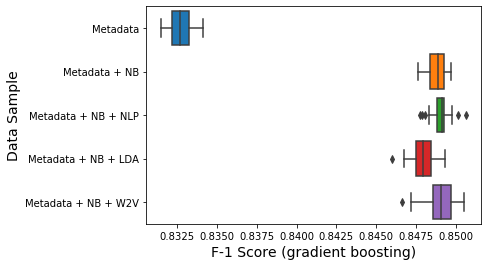

In [49]:
plt.subplots(1, 1, figsize=(6,4))
sns.boxplot(x=(lgbs['f1_score']), y=lgbs['name'], order=['Metadata', 'Metadata + NB', 'Metadata + NB + NLP', 'Metadata + NB + LDA', 'Metadata + NB + W2V'], saturation=1)
plt.ylabel("Data Sample", size=14)
plt.xlabel("F-1 Score (gradient boosting)", size=14)
plt.savefig("plots/lgbm_data_f1.png", bbox_inches='tight')

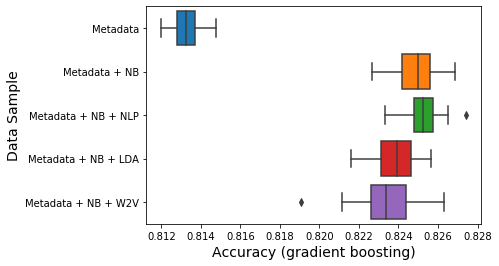

In [50]:
plt.subplots(1, 1, figsize=(6,4))
sns.boxplot(x=(lgbs['accuracy']), y=lgbs['name'], order=['Metadata', 'Metadata + NB', 'Metadata + NB + NLP', 'Metadata + NB + LDA', 'Metadata + NB + W2V'], saturation=1)
plt.ylabel("Data Sample", size=14)
plt.xlabel("Accuracy (gradient boosting)", size=14)
plt.savefig("plots/lgbm_data_acc.png", bbox_inches='tight')

In [3]:
core_nlp_sentiment = pd.read_csv("data/res/sentiment_col.csv")
core_nlp_sentiment['un_id'] = np.arange(0, core_nlp_sentiment.shape[0], 1 )

In [5]:
dfs = pd.read_parquet("data/all_processed_df.parquet.gzip")
dfs['outcome'] = np.where(dfs['state']=="successful", 1, 0)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

In [7]:
x_tr, x_t, y_tr, y_t = train_test_split(core_nlp_sentiment, dfs['outcome'], random_state=229, test_size=0.3)

In [13]:
logreg = lm.LinearRegression()
logreg.fit(x_tr, y_tr)
y_t_pred = logreg.predict(x_t)

In [15]:
print(classification_report(y_t, np.round(y_t_pred)))

/Users/benji/anaconda3/envs/play/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/benji/anaconda3/envs/play/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     26428
           1       0.60      1.00      0.75     39947

    accuracy                           0.60     66375
   macro avg       0.30      0.50      0.38     66375
weighted avg       0.36      0.60      0.45     66375



/Users/benji/anaconda3/envs/play/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import pickle

In [22]:
try: 
    f = open("data/res/text_models.pkl", "rb")
    text_models = pickle.load(f)
    f.close()
except:
    raise Warning("Text models do not exist. Will load from scratch")

In [23]:
lda_train, lda_test = text_models['lda_train'], text_models['lda_test']

In [24]:
logreg = lm.LinearRegression()
logreg.fit(lda_train, y_tr)
y_t_pred = logreg.predict(lda_test)
print(classification_report(y_t, np.round(y_t_pred)))

              precision    recall  f1-score   support

           0       0.54      0.15      0.24     26428
           1       0.62      0.91      0.74     39947

    accuracy                           0.61     66375
   macro avg       0.58      0.53      0.49     66375
weighted avg       0.59      0.61      0.54     66375



In [27]:
logreg = lm.LogisticRegression()
logreg.fit(lda_train, y_tr)
y_t_pred = logreg.predict(lda_test)
print(classification_report(y_t, np.round(y_t_pred)))

              precision    recall  f1-score   support

           0       0.54      0.16      0.25     26428
           1       0.62      0.91      0.74     39947

    accuracy                           0.61     66375
   macro avg       0.58      0.54      0.49     66375
weighted avg       0.59      0.61      0.54     66375

